In [15]:
import sys

sys.path.append("..")

In [16]:
from sysmexalign.load_and_preprocess import get_data_paths, process_and_save_data

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

import re
import os

In [18]:
channel = "PLTF"

In [19]:
from sysmexalign.load_and_preprocess import parse_sysmex_raw_filename, SysmexRawData

test_filename = f"/home/dk659/bloodcounts_gitlab/sysmex_raw_alignment/data/raw/STRIDES/simon_batch1_part1/SCT/{channel}_[XN-20^14232][00-22_123][20210930_224730][      =G07242047804673].116.csv"
try:
    result = parse_sysmex_raw_filename(os.path.basename(test_filename))
    print("Channel Name:", result["channel_name"])
    print("Analyser ID:", result["analyser_id"])
    print("DateTime:", result["datetime"])
    print("Sample Number:", result["sample_number"])
    print("Flow Cytometry channel names:", result["data_channel_names"])
except ValueError as e:
    print("Error:", str(e))

Channel Name: PLTF
Analyser ID: XN-20^14232
DateTime: 2021-09-30 22:47:30
Sample Number: =G07242047804673
Flow Cytometry channel names: ['SFL', 'FSC', 'SSC', 'FSCW']


In [ ]:
test = pd.read_csv(test_filename)
test["fsc_log"] = np.log10(test["FSC"]) * (255 / np.log10(255))
test["fsc_sqrt"] = np.sqrt(test["FSC"]) * (255 / np.sqrt(255))

test

,RepeatCount,ParticleID,FSC,SSC,SFL,FSCW,fsc_log,fsc_sqrt
0,0,0,3,19,27,4,50.556363,27.658633
1,0,1,105,60,137,24,214.167740,163.630682
2,0,2,98,78,154,22,210.992799,158.082257
3,0,3,117,80,148,23,219.147554,172.728110
4,0,4,101,62,135,23,212.380393,160.483644
...,...,...,...,...,...,...,...,...
11153,0,11153,115,78,143,23,218.354114,171.245438
11154,0,11154,4,21,9,4,63.795028,31.937439
11155,0,11155,93,116,173,23,208.582909,153.996753
11156,0,11156,11,13,42,11,110.347268,52.962251


In [21]:
data = SysmexRawData(test_filename)

In [22]:
data.datetime

datetime.datetime(2021, 9, 30, 22, 47, 30)

In [23]:
data.flowcyto_channels

['SFL', 'FSC', 'SSC', 'FSCW']

In [24]:
data.data

array([[171., 167., 149., 255.],
       [ 35., 160.,  46., 255.],
       [ 41.,  19.,   9., 255.],
       ...,
       [ 87., 241., 184.,  60.],
       [ 82., 242., 170.,  61.],
       [ 73., 243., 169.,  61.]])

In [25]:
data_raw = pd.read_csv(test_filename)

In [26]:
data_raw

,RepeatCount,Phase,ParticleID,FSC,SSC,SFL,FSCW
0,0,A,0,167,149,171,NaN
1,0,A,1,160,46,35,NaN
2,0,A,2,19,9,41,NaN
3,0,A,3,51,46,74,NaN
4,0,A,4,67,60,91,NaN
...,...,...,...,...,...,...,...
33336,0,B,33336,242,169,71,62.0
33337,0,B,33337,243,179,87,59.0
33338,0,B,33338,241,184,87,60.0
33339,0,B,33339,242,170,82,61.0


In [ ]:
data_raw["FSC_self_log"] = np.log10(data_raw["FSC"]) * (255 / np.log10(255))

data_raw.head(20)

,RepeatCount,ParticleID,SFL,FSC,FSClog,SFLx2,Unnamed: 6,FSC_self_log
0,0,0,20,200,244,40,NaN,243.820009
1,0,1,14,180,240,29,NaN,238.971488
2,0,2,24,201,245,48,NaN,244.049528
3,0,3,16,179,240,32,NaN,238.715118
4,0,4,38,255,255,77,NaN,255.000000
5,0,5,16,186,241,32,NaN,240.480423
6,0,6,30,199,244,61,NaN,243.589340
7,0,7,17,185,241,34,NaN,240.232345
8,0,8,16,185,241,32,NaN,240.232345
9,0,9,19,179,240,39,NaN,238.715118


In [16]:
# load file from pickle
with open("transformations/INTERVAL_36_to_STRIDES_transport_dict_RET.pkl", "rb") as f:
    transport_dict = pickle.load(f)

In [17]:
transport_dict

{'transport_maps': array([[[[0.        , 0.        ],
          [0.        , 0.        ]],
 
         [[1.18783648, 0.0154522 ],
          [0.0154522 , 1.17876214]],
 
         [[0.        , 0.        ],
          [0.        , 0.        ]],
 
         ...,
 
         [[0.        , 0.        ],
          [0.        , 0.        ]],
 
         [[0.        , 0.        ],
          [0.        , 0.        ]],
 
         [[0.        , 0.        ],
          [0.        , 0.        ]]],
 
 
        [[[0.        , 0.        ],
          [0.        , 0.        ]],
 
         [[0.        , 0.        ],
          [0.        , 0.        ]],
 
         [[0.        , 0.        ],
          [0.        , 0.        ]],
 
         ...,
 
         [[0.        , 0.        ],
          [0.        , 0.        ]],
 
         [[0.        , 0.        ],
          [0.        , 0.        ]],
 
         [[0.        , 0.        ],
          [0.        , 0.        ]]],
 
 
        [[[0.        , 0.        ],
        

### Loading decrypted HAAS

In [3]:
data_dict = get_data_paths("data/raw/INTERVAL_36", qc_only=True)

In [4]:
sct_ret = pd.read_csv(data_dict["sct_ret"][0])
sct_pltf = pd.read_csv(data_dict["sct_pltf"][1])
sct_wdf = pd.read_csv(data_dict["sct_wdf"][0])
sct_wnr = pd.read_csv(data_dict["sct_wnr"][0])

In [5]:
current_file = sct_ret

In [ ]:
import numpy as np
from flowio.create_fcs import create_fcs

np.random.seed(42)

# these clusters are clearly separated
cluster1 = np.random.multivariate_normal(
    [6000.0, 6000.0, 0.0, 3000.0],
    [[600000, 300, 0, 0], [300, 1000, 0, 0], [0, 0, 1, 10], [0, 0, 10, 1000]],
    (2000,),
)
cluster2 = np.random.multivariate_normal(
    [-10.0, 0.0, 0.0, 0.0],
    [[10000, 100, 0, 0], [100, 10000, 0, 0], [0, 0, 100000, 0], [0, 0, 0, 1000]],
    (2000,),
)
cluster3a = np.random.multivariate_normal(
    [7000.0, 2000.0, -6.0, 1500],
    [[100000, 100, 0, 0], [100, 100000, 100, 0], [0, 100, 10000, 0], [0, 0, 0, 10000]],
    (2000,),
)
cluster3b = np.random.multivariate_normal(
    [2000.0, 7000.0, 1500.0, -6.0],
    [[100000, 100, 0, 0], [100, 100000, 100, 0], [0, 100, 10000, 0], [0, 0, 0, 10000]],
    (2000,),
)

In [7]:
cluster1.shape, cluster2.shape, cluster3a.shape, cluster3b.shape

((2000, 4), (2000, 4), (2000, 4), (2000, 4))

In [ ]:
data_set1 = np.vstack([cluster1, cluster2, cluster3a]).flatten().tolist()

data_set2 = np.vstack([cluster1, cluster2, cluster3b]).flatten().tolist()

channel_names = ["channel_A", "channel_B", "channel_C", "channel_D"]

In [9]:
len(data_set1), len(data_set2)

(24000, 24000)

In [ ]:
import flowio

fh = open("data/dummy_tests/data_set1.fcs", "wb")
create_fcs(fh, data_set1, channel_names)
fh.close()

fh = open("data/dummy_tests/data_set2.fcs", "wb")
create_fcs(fh, data_set2, channel_names)
fh.close()

In [ ]:
test1 = flowio.FlowData("data/dummy_tests/data_set1.fcs")

In [ ]:
# recreate example for our data
import flowio

df = current_file[["SFL", "FSC"]]

data_set = (
    np.vstack(
        [
            df.values,
        ]
    )
    .flatten()
    .tolist()
)

channel_names = [
    "SFL",
    "FSC",
]

metadata = {
    "Analyser": "INTERVAL 36",
    "Date": "2020-01-01",  # TODO get from file
    "Filename": "sct_ret",  # TODO get from file
    "Channel": "RET",  # TODO get from file
}

fh = open("data/dummy_tests/interval_ret_test.fcs", "wb")
create_fcs(fh, data_set, channel_names, metadata_dict=metadata)
fh.close()

In [13]:
data_dict["sct_ret"][0]

'data/raw/INTERVAL_36/SCT/RET_[XN-10^11036][00-15_5][20160415_093802][           QC-60951101].116.csv'

In [ ]:
from scripts.load_and_preprocess import make_fsc_from_raw_sct

make_fsc_from_raw_sct(
    data_dict["sct_ret"][0], "data/dummy_tests/interval_ret_test.fcs", "INTERVAL 36"
)
make_fsc_from_raw_sct(
    data_dict["sct_pltf"][1], "data/dummy_tests/interval_pltf_test.fcs", "INTERVAL 36"
)
make_fsc_from_raw_sct(
    data_dict["sct_wdf"][0], "data/dummy_tests/interval_wdf_test.fcs", "INTERVAL 36"
)
make_fsc_from_raw_sct(
    data_dict["sct_wnr"][0], "data/dummy_tests/interval_wnr_test.fcs", "INTERVAL 36"
)

In [ ]:
test_interval = flowio.FlowData("data/dummy_tests/interval_ret_test.fcs")

In [21]:
test_interval.text

{'beginanalysis': '0',
 'begindata': '701',
 'beginstext': '0',
 'byteord': '1,2,3,4',
 'datatype': 'F',
 'endanalysis': '0',
 'enddata': '286820',
 'endstext': '0',
 'mode': 'L',
 'nextdata': '0',
 'par': '2',
 'tot': '35765',
 'p1b': '32',
 'p1e': '0,0',
 'p1g': '1.0',
 'p1r': '262144',
 'p1n': 'SFL',
 'p2b': '32',
 'p2e': '0,0',
 'p2g': '1.0',
 'p2r': '262144',
 'p2n': 'FSC',
 'date': '20160415_093802',
 'analyser': 'INTERVAL 36',
 'filename': 'data/raw/INTERVAL_36/SCT/RET_[XN-10^11036][00-15_5][20160415_093802][           QC-60951101].116.csv',
 'channel': 'RET',
 'samplenumber': 'QC-60951101'}

In [26]:
lengths = []
for i in range(500):
    lengths.append(pd.read_csv(data_dict["sct_wdf"][i]).shape[0])

In [27]:
print("Mean length: ", np.mean(lengths))
print("Median length: ", np.median(lengths))
print("Max length: ", np.max(lengths))
print("Min length: ", np.min(lengths))
print("Std length: ", np.std(lengths))

Mean length:  55886.946
Median length:  60662.0
Max length:  65534
Min length:  4276
Std length:  11654.161415867038


In [23]:
current_file

,RepeatCount,ParticleID,SFL,FSC,FSClog,SFLx2,Unnamed: 6
0,0,0,22,160,235,45,NaN
1,0,1,23,164,236,47,NaN
2,0,2,26,157,234,52,NaN
3,0,3,22,159,235,45,NaN
4,0,4,22,124,224,45,NaN
...,...,...,...,...,...,...,...
35760,0,35760,20,140,230,41,NaN
35761,0,35761,21,153,233,42,NaN
35762,0,35762,24,167,237,48,NaN
35763,0,35763,19,145,231,38,NaN


In [7]:
current_file = current_file[current_file["RepeatCount"] == 0]

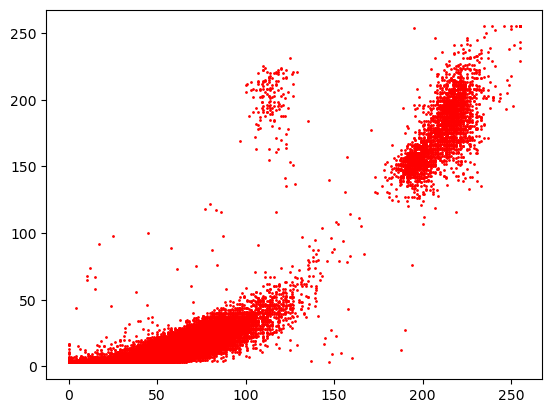

In [8]:
# plt.scatter(sct_pltf[sct_pltf["Phase"]=="A"]["SFL"], sct_pltf[sct_pltf["Phase"]=="A"]["FSC"], s=1, color="blue")
# plt.scatter(sct_pltf[sct_pltf["Phase"]=="B"]["SFL"], sct_pltf[sct_pltf["Phase"]=="B"]["FSC"], s=1, color="red")

plt.scatter(current_file["SFL"], current_file["FSC"], s=1, color="red")

In [9]:
current_file[["SFL", "FSC", "SSC"]]

,SFL,FSC,SSC
0,52,6,10
1,41,18,30
2,47,10,18
3,19,3,41
4,48,10,18
...,...,...,...
52099,59,5,14
52100,52,16,23
52101,58,12,15
52102,52,4,8


In [82]:
dummy_df = pd.DataFrame(
    list(np.random.randn(100, 2)) + [[1, 1], [1, 1], [0, 1], [0, 0], [0, 1]],
    columns=["x", "y"],
)

In [83]:
dummy_df

,x,y
0,0.742554,-0.984454
1,-1.082378,-2.040949
2,1.630603,-0.069042
3,1.605512,-2.068219
4,-0.348462,0.146186
...,...,...
100,1.000000,1.000000
101,1.000000,1.000000
102,0.000000,1.000000
103,0.000000,0.000000


### Loading saved numpy arrays

In [91]:
# get a list of all files in data/processed/INTERVAL_36
numpy_files = [f for f in os.listdir("data/processed/INTERVAL_36")]

In [102]:
example_file = numpy_files[0]

In [103]:
example_file

'sct_wdf_[None]_20140423_093455.npy'

In [104]:
pattern = r"\d{8}_\d{6}"
match = re.search(pattern, example_file).group(0)

match

'20140423_093455'

### Preparing representative samples

In [2]:
import argparse
import copy
import json
import os
import sys
import pickle

import numpy as np
import pandas as pd
from joblib import Parallel, delayed
from sklearn.mixture import GaussianMixture
from tqdm import tqdm

sys.path.append("..")

from sysmexalign.gmm_ot import (
    compute_gmm_transport_map,
    transform_points_gmm,
    validate_transformation,
)
from sysmexalign.load_and_preprocess import (
    SysmexRawData,
    concatenate_sysmex_data,
    load_sample_nos,
    parse_sysmex_raw_filename,
)

In [ ]:
SOURCE_FOLDER = (
    "/home/dk659/bloodcounts_gitlab/sysmex_raw_alignment/data/raw/INTERVAL_36/SCT"
)

SOURCE_NAME = "INTERVAL_36"
CHANNEL = "PLTF"

# Load data
# go through source folder and load all data
source_folder_files = os.listdir(SOURCE_FOLDER)
relevant_files = [
    f
    for f in source_folder_files
    if ((f.startswith(CHANNEL)) and (f.endswith("116.csv")))
]

print("Loading source data...")
print("Number of relevant source files:", len(relevant_files))
source_data = Parallel(n_jobs=-1)(
    delayed(SysmexRawData)(os.path.join(SOURCE_FOLDER, file))
    for file in tqdm(relevant_files)
)

if len(source_data) == 0:
    raise ValueError(f"No data found for channel {CHANNEL} in source distribution.")

print("Doing analysis on channel:", CHANNEL)
print("Concatenating data...")

# concatenate all source and target data
source_cct = concatenate_sysmex_data(source_data)

# remove under/oversaturated flow cytometry measurements (0s and 255s) as they are not correctly measured and would mess up the GMMs
source_cct.data = source_cct.data[
    (source_cct.data != 0).all(axis=1) & (source_cct.data != 255).all(axis=1)
]

print("number of source data samples:", source_cct.data.shape[0])

if source_cct.data.shape[0] > 1_000_000:
    print("Downsampling source data to 1 million points...")
    source_cct.data = source_cct.data[
        np.random.choice(source_cct.data.shape[0], 1_000_000, replace=False)
    ]

Loading source data...
Number of relevant source files: 58032


100%|██████████| 58032/58032 [01:59<00:00, 487.13it/s]


Doing analysis on channel: PLTF
Concatenating data...
number of source data samples: 699480321
Downsampling source data to 1 million points...


In [ ]:
source_cct.to_csv(
    f"/home/dk659/bloodcounts_gitlab/sysmex_raw_alignment/data/processed/INTERVAL_36/{CHANNEL}_for_gating.csv"
)

### Extras

In [30]:
import os
import pandas as pd
from tqdm import tqdm

# load all of STRIDES and export for Nick...
strides_path = "/home/dk659/bloodcounts_gitlab/sysmex_raw_alignment/data/raw/STRIDES"
strides_files = os.listdir(strides_path)

strides_xn_samples = []

# go through all folders in strides_path, use pandas to read XN_SAMPLE.csv in the folder and append the dataframe to strides_xn_samples
for folder in tqdm(strides_files):
    folder_path = os.path.join(strides_path, folder)
    if os.path.isdir(folder_path):
        xn_sample_file = os.path.join(folder_path, "XN_SAMPLE.csv")
        if os.path.exists(xn_sample_file):
            df = pd.read_csv(xn_sample_file)
            strides_xn_samples.append(df)

# concatenate all dataframes in strides_xn_samples
strides_xn_sample = pd.concat(strides_xn_samples, ignore_index=True)

  0%|          | 0/6 [00:00<?, ?it/s]/tmp/ipykernel_440607/1505509304.py:17: DtypeWarning: Columns (4,18,19,82,83,84,85,91,92,94,96,98,100,102,104,106,108,110,120,121,122,123,124,126,128,130,132,134,136,138,140,142,144,146,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,164,166,167,168,169,172,173,174,175,176,177,178,179,180,181,182,183,184,186,188,189,190,191,192,193,194,195,196,197,198,199,200,202,204,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,238,240,241,242,244,245,246,247,248,249,250,251,252,253,254,256,258,259,260,261,262,263,264,265,266,267,268,270,272,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,355,381,382,383,432,434,436,438,439,441,452,454,467,468,469,471,472,473,474,475,476,477,478,479,480,481,482,483,484,487,488,489,490) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(xn_sample_file)
 17%|█▋        | 1/6 [00:00

In [31]:
for col in strides_xn_sample.columns:
    if "wbc" in col.lower():
        print(col)

WBC Abnormal
WBC Suspect
WBC Info.
IP ABN(WBC)WBC Abn Scattergram
IP ABN(WBC)Neutoropenia
IP ABN(WBC)Neutorophilia
IP ABN(WBC)Lympopenia
IP ABN(WBC)Lympocytosis
IP ABN(WBC)Monocytosis
IP ABN(WBC)Eosinophilia
IP ABN(WBC)Basophilia
IP ABN(WBC)Leukocytopenia
IP ABN(WBC)Leukocytosis
IP ABN(WBC)NRBC Present
IP ABN(WBC)IG Present
IP SUS(WBC)Abn Lymho/L-Blasts?
IP SUS(WBC)Blasts?
IP SUS(WBC)AbnLymp?
IP SUS(WBC)Left Shift?
IP SUS(WBC)Atypical Lympho?
WBC(10^3/uL)
WBC/M
WBC-N(10^3/uL)
WBC-N/M
WBC-D(10^3/uL)
WBC-D/M
WBC-P(10^3/uL)
WBC-P/M
WBC-BF(10^3/uL)
WBC-BF/M
HF-BF%(/100WBC)
WBC-FX(ch)
DLT-WBCD()
DLT-WBCP()
WBC-N2(10^3/uL)
WBC-D2(10^3/uL)
WBC-P2(10^3/uL)
WBC(hsA)(10^3/uL)
WBC(hsA)/M
HF%(hsA)(/100WBC)
WBC-N(SSC-FSC)(10^3/uL)
WBC-N(SSC-FSC)/M
WBC-N(SSC-FSC)2(10^3/uL)
WBC-N(SSC-FSC)2/M
WBC(10^3/uL).1
WBC/M.1


In [32]:
nick_cols = [
    "Analyzer ID",
    "Date",
    "Time",
    "Sample No.",
    "PLT(10^3/uL)",
    "MPV(fL)",
    "PDW(fL)",
    "RBC(10^6/uL)",
    "MCV(fL)",
    "HCT(%)",
    "MCH(pg)",
    "MCHC(g/dL)",
    "HGB(g/dL)",
    "RDW-SD(fL)",
    "NRBC%(%)",
    "MONO#(10^3/uL)",
    "MONO%(%)",
    "NEUT#(10^3/uL)",
    "NEUT%(%)",
    "IP ABN(WBC)Neutoropenia",
    "IP ABN(WBC)Neutorophilia",
    "NEUT#(hsA)(10^3/uL)",
    "NEUT-RI(FI)",
    "NEUT-GI(SI)",
    "EO#(10^3/uL)",
    "EO%(%)",
    "BASO#(10^3/uL)",
    "BASO%(%)",
    "IG#(10^3/uL)",
    "IG%(%)",
    "LYMPH#(10^3/uL)",
    "LYMPH%(%)",
    "WBC(10^3/uL)",
]

nick_df = strides_xn_sample[nick_cols]#.to_csv("/rds/project/rds-ccRCdkyWMsY/ref/STRIDES/FBC_data/strides_neutrophils.csv", index=False)
nick_df.head()

,Analyzer ID,Date,Time,Sample No.,PLT(10^3/uL),MPV(fL),PDW(fL),RBC(10^6/uL),MCV(fL),HCT(%),...,NEUT-GI(SI),EO#(10^3/uL),EO%(%),BASO#(10^3/uL),BASO%(%),IG#(10^3/uL),IG%(%),LYMPH#(10^3/uL),LYMPH%(%),WBC(10^3/uL)
0,XN-20^14232,2020/09/29,15:17:53,=G05252038944983,307,10.4,12.5,5.19,91.3,47.4,...,156.3,0.4,4.3,0.1,1.1,0.04,0.4,2.15,23.0,9.36
1,XN-20^14232,2020/09/29,15:22:45,=G05252038944983,304,10.3,12.1,5.24,91.6,48.0,...,156.3,0.39,4.0,0.09,0.9,0.03,0.3,2.16,22.4,9.64
2,XN-20^14232,2020/09/29,15:24:12,=G05252038944983,304,10.3,12.6,5.2,91.7,47.7,...,156.2,0.41,4.4,0.1,1.1,0.02,0.2,2.13,22.6,9.41
3,XN-20^14232,2020/09/29,15:29:47,G052520389449,300,10.3,11.6,5.19,91.5,47.5,...,156.7,0.42,4.5,0.09,1.0,0.03,0.3,2.08,22.3,9.34
4,XN-20^14232,2020/10/01,16:55:27,=G05252038944983,313,11.2,13.3,5.19,102.3,53.1,...,144.2,0.37,4.0,0.11,1.2,0.02,0.2,2.2,23.9,9.21


In [33]:
linkage = pd.read_csv("/rds/project/rds-ccRCdkyWMsY/ref/STRIDES/FBC_data/extra/export_for_nbr_neutrophil/strides.genotype_data.csv")
linkage.head()

,g_number,Contamination,Sample,SubmittedGender,computed_gender,sex_concordance,estimated_ancestry,Fy(a),Fy(b),NM_002036.4:c.125G>A,NM_002036.4:c.265C>T,NM_002036.4:c.-67T>C,FY_null_detected
0,G052521214653X,0.000959,A01_G052521214653X_FH00259175_UKBBv2-2_NHSBT.CEL,female,female,0.0,EUR,+,+,0/1,0/0,0/0,NaN
1,G052521285741F,-0.000127,A01_G052521285741F_FH00259174_UKBBv2-2_NHSBT.CEL,male,male,0.0,EUR,+,+,0/1,0/0,0/0,NaN
2,G0525213120830,-0.000262,A01_G0525213120830_FH00259402_UKBBv2-2_NHSBT.CEL,male,male,0.0,EUR,+,+,0/1,0/0,0/0,NaN
3,G052521313689Z,0.014211,A01_G052521313689Z_FH00259165_UKBBv2-2_NHSBT.CEL,female,female,0.0,EUR,-,+,1/1,0/0,0/0,NaN
4,G0525213806420,-0.001505,A01_G0525213806420_FH00259414_UKBBv2-2_NHSBT.CEL,female,female,0.0,EUR,+,-,0/0,0/0,0/0,NaN


In [34]:
linkage["linkID"] = linkage["g_number"].str[:-1]
# for nick_df, we need to add the linkID column from Sample No., where we remove the "=" if it exists
nick_df["linkID"] = nick_df["Sample No."].str.replace("=", "", regex=False)
nick_df["linkID"] = nick_df["linkID"].str[:12]
linkage["linkID"] = linkage["linkID"].str[:12]

/tmp/ipykernel_440607/553937972.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nick_df["linkID"] = nick_df["Sample No."].str.replace("=", "", regex=False)
/tmp/ipykernel_440607/553937972.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nick_df["linkID"] = nick_df["linkID"].str[:12]


In [35]:
# for both linkage and nick_df, get the minimum entry lengths for entries in the linkID column
linkage["linkID"].str.len().min(), nick_df["linkID"].str.len().min()

(np.int64(12), np.int64(12))

In [36]:
# check that every entry in linkID for both dataframes starts with "G"
sum(linkage["linkID"].str.startswith("G"))/len(linkage), sum(nick_df["linkID"].str.startswith("G"))/len(nick_df)

(1.0, 1.0)

In [37]:
import pandas as pd
import numpy as np

def analyse_dataframe_matching(df_left, df_right, key_column='linkID'):
    """
    Analyse matching statistics between two DataFrames based on a key column.
    
    Parameters:
    df_left, df_right: pandas DataFrames
    key_column: string, name of the column to match on (default: 'linkID')
    
    Returns:
    Dictionary with comprehensive matching statistics
    """
    
    print(f"=== DataFrame Matching Analysis on '{key_column}' ===\n")
    
    # Basic DataFrame info
    print("Basic DataFrame Information:")
    print(f"Left DataFrame shape: {df_left.shape}")
    print(f"Right DataFrame shape: {df_right.shape}")
    print(f"Left DataFrame {key_column} count: {len(df_left[key_column])}")
    print(f"Right DataFrame {key_column} count: {len(df_right[key_column])}")
    print()
    
    # Check for duplicates within each DataFrame
    left_duplicates = df_left[key_column].duplicated().sum()
    right_duplicates = df_right[key_column].duplicated().sum()
    left_unique = df_left[key_column].nunique()
    right_unique = df_right[key_column].nunique()
    
    print("Duplicate Analysis:")
    print(f"Left DataFrame duplicates: {left_duplicates}")
    print(f"Right DataFrame duplicates: {right_duplicates}")
    print(f"Left DataFrame unique {key_column}s: {left_unique}")
    print(f"Right DataFrame unique {key_column}s: {right_unique}")
    print()
    
    # Get unique values from each DataFrame
    left_ids = set(df_left[key_column].dropna())
    right_ids = set(df_right[key_column].dropna())
    
    # Calculate intersections and differences
    both = left_ids & right_ids
    only_left = left_ids - right_ids
    only_right = right_ids - left_ids
    
    print("Matching Statistics:")
    print(f"IDs in both DataFrames: {len(both)}")
    print(f"IDs only in left DataFrame: {len(only_left)}")
    print(f"IDs only in right DataFrame: {len(only_right)}")
    print(f"Total unique IDs across both: {len(left_ids | right_ids)}")
    print()
    
    # Calculate percentages
    total_left = len(left_ids)
    total_right = len(right_ids)
    
    if total_left > 0:
        match_rate_left = (len(both) / total_left) * 100
        print(f"Match rate (left perspective): {match_rate_left:.1f}%")
    
    if total_right > 0:
        match_rate_right = (len(both) / total_right) * 100
        print(f"Match rate (right perspective): {match_rate_right:.1f}%")
    print()
    
    # Check for null values
    left_nulls = df_left[key_column].isnull().sum()
    right_nulls = df_right[key_column].isnull().sum()
    
    print("Null Value Analysis:")
    print(f"Left DataFrame null {key_column}s: {left_nulls}")
    print(f"Right DataFrame null {key_column}s: {right_nulls}")
    print()
    
    # Show some example IDs (if not too many)
    if len(only_left) <= 10 and len(only_left) > 0:
        print(f"Example IDs only in left: {sorted(list(only_left))}")
    elif len(only_left) > 10:
        print(f"First 10 IDs only in left: {sorted(list(only_left))[:10]}")
    
    if len(only_right) <= 10 and len(only_right) > 0:
        print(f"Example IDs only in right: {sorted(list(only_right))}")
    elif len(only_right) > 10:
        print(f"First 10 IDs only in right: {sorted(list(only_right))[:10]}")
    
    print()
    
    # Return results as dictionary for further analysis
    results = {
        'left_shape': df_left.shape,
        'right_shape': df_right.shape,
        'left_total_rows': len(df_left),
        'right_total_rows': len(df_right),
        'left_duplicates': left_duplicates,
        'right_duplicates': right_duplicates,
        'left_unique_ids': left_unique,
        'right_unique_ids': right_unique,
        'left_nulls': left_nulls,
        'right_nulls': right_nulls,
        'ids_in_both': len(both),
        'ids_only_left': len(only_left),
        'ids_only_right': len(only_right),
        'total_unique_ids': len(left_ids | right_ids),
        'match_rate_left_pct': (len(both) / total_left) * 100 if total_left > 0 else 0,
        'match_rate_right_pct': (len(both) / total_right) * 100 if total_right > 0 else 0,
        'both_ids': both,
        'only_left_ids': only_left,
        'only_right_ids': only_right
    }
    
    return results

In [38]:
matching_results = analyse_dataframe_matching(linkage, nick_df, key_column="linkID")

=== DataFrame Matching Analysis on 'linkID' ===

Basic DataFrame Information:
Left DataFrame shape: (65460, 14)
Right DataFrame shape: (70109, 34)
Left DataFrame linkID count: 65460
Right DataFrame linkID count: 70109

Duplicate Analysis:
Left DataFrame duplicates: 20220
Right DataFrame duplicates: 25493
Left DataFrame unique linkIDs: 45240
Right DataFrame unique linkIDs: 44616

Matching Statistics:
IDs in both DataFrames: 24848
IDs only in left DataFrame: 20392
IDs only in right DataFrame: 19768
Total unique IDs across both: 65008

Match rate (left perspective): 54.9%
Match rate (right perspective): 55.7%

Null Value Analysis:
Left DataFrame null linkIDs: 0
Right DataFrame null linkIDs: 0

First 10 IDs only in left: ['G05251916364', 'G05251916367', 'G05251916378', 'G05251916381', 'G05251916382', 'G05251916390', 'G05251916391', 'G05251916392', 'G05251916398', 'G05251916399']
First 10 IDs only in right: ['G05252038800', 'G05252038807', 'G05252038808', 'G05252038809', 'G05252038830', 'G0

In [18]:
nick_df = nick_df.merge(linkage, on="linkID", how="left")

In [19]:
nick_df

,Analyzer ID,Date,Time,Sample No.,PLT(10^3/uL),MPV(fL),PDW(fL),RBC(10^6/uL),MCV(fL),HCT(%),...,SubmittedGender,computed_gender,sex_concordance,estimated_ancestry,Fy(a),Fy(b),NM_002036.4:c.125G>A,NM_002036.4:c.265C>T,NM_002036.4:c.-67T>C,FY_null_detected
0,XN-20^14232,2020/09/29,15:17:53,=G05252038944983,307,10.4,12.5,5.19,91.3,47.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,XN-20^14232,2020/09/29,15:22:45,=G05252038944983,304,10.3,12.1,5.24,91.6,48.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,XN-20^14232,2020/09/29,15:24:12,=G05252038944983,304,10.3,12.6,5.2,91.7,47.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,XN-20^14232,2020/09/29,15:29:47,G052520389449,300,10.3,11.6,5.19,91.5,47.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,XN-20^14232,2020/10/01,16:55:27,=G05252038944983,313,11.2,13.3,5.19,102.3,53.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70104,XN-20^14232,2022/02/02,17:36:42,=G07242150383161,209,11.3,14.8,5.32,91.4,48.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70105,XN-20^14232,2022/02/02,17:42:58,=G07242143178676,249,11.6,16.1,4.35,100.7,43.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70106,XN-20^14232,2022/02/02,17:44:13,=G07242150380173,217,12.9,17.8,4.61,100.2,46.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70107,XN-20^14232,2022/02/02,17:45:28,=G09562216959465,229,11.8,15.0,4.91,95.5,46.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
